# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/porter_data_1.csv'
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [3]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

In [4]:
df[['created_at', 'actual_delivery_time']].head()

,created_at,actual_delivery_time
0,2015-02-06 22:24:17,2015-02-06 23:11:17
1,2015-02-10 21:49:25,2015-02-10 22:33:25
2,2015-02-16 00:11:35,2015-02-16 01:06:35
3,2015-02-12 03:36:46,2015-02-12 04:35:46
4,2015-01-27 02:12:36,2015-01-27 02:58:36


In [5]:
df.dtypes

,0
market_id,float64
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_primary_category,int64
order_protocol,float64
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64


In [6]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance'],
      dtype='object')

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [7]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [8]:
# Convert categorical features to category type

cat_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [9]:
df.dtypes

,0
market_id,category
created_at,datetime64[ns]
actual_delivery_time,datetime64[ns]
store_primary_category,category
order_protocol,category
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [10]:
# Calculate time taken in minutes

df['delivery_duration_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [11]:
df[['created_at', 'actual_delivery_time', 'delivery_duration_minutes']].head()

,created_at,actual_delivery_time,delivery_duration_minutes
0,2015-02-06 22:24:17,2015-02-06 23:11:17,47.0
1,2015-02-10 21:49:25,2015-02-10 22:33:25,44.0
2,2015-02-16 00:11:35,2015-02-16 01:06:35,55.0
3,2015-02-12 03:36:46,2015-02-12 04:35:46,59.0
4,2015-01-27 02:12:36,2015-01-27 02:58:36,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [12]:
# Extract the hour and day of week from the 'created_at' timestamp

df['created_hour'] = df['created_at'].dt.hour
df['created_day_of_week'] = df['created_at'].dt.day_of_week

# Create a categorical feature 'isWeekend'

df['isWeekend'] = df['created_day_of_week'].isin([5, 6]).astype('category')

In [13]:
df[['created_at', 'created_hour', 'created_day_of_week', 'isWeekend']].head()

,created_at,created_hour,created_day_of_week,isWeekend
0,2015-02-06 22:24:17,22,4,False
1,2015-02-10 21:49:25,21,1,False
2,2015-02-16 00:11:35,0,0,False
3,2015-02-12 03:36:46,3,3,False
4,2015-01-27 02:12:36,2,1,False


In [14]:
# Drop unnecessary columns

df = df.drop(['created_at', 'actual_delivery_time','market_id'], axis=1)

In [15]:
df.columns

Index(['store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'delivery_duration_minutes',
       'created_hour', 'created_day_of_week', 'isWeekend'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [16]:
# Define target variable (y) and features (X)

y = df['delivery_duration_minutes']
x = df.drop('delivery_duration_minutes', axis=1)

In [17]:
x.shape, y.shape

((175777, 14), (175777,))

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [18]:
# Split data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((123043, 14), (52734, 14), (123043,), (52734,))

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [20]:
df.dtypes

,0
store_primary_category,category
order_protocol,category
total_items,int64
subtotal,int64
num_distinct_items,int64
min_item_price,int64
max_item_price,int64
total_onshift_dashers,float64
total_busy_dashers,float64
total_outstanding_orders,float64


In [21]:
# Define numerical and categorical columns for easy EDA and data manipulation

categorical_cols = ['store_primary_category', 'order_protocol', 'isWeekend']

numerical_cols = [col for col in x.columns if col not in categorical_cols]

In [22]:
x[categorical_cols].head()
x[numerical_cols].head()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,created_hour,created_day_of_week
0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,22,4
1,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,21,1
2,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0,0
3,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,3,3
4,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,2,1


In [23]:
print(categorical_cols)
print(numerical_cols)

['store_primary_category', 'order_protocol', 'isWeekend']
['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'created_hour', 'created_day_of_week']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

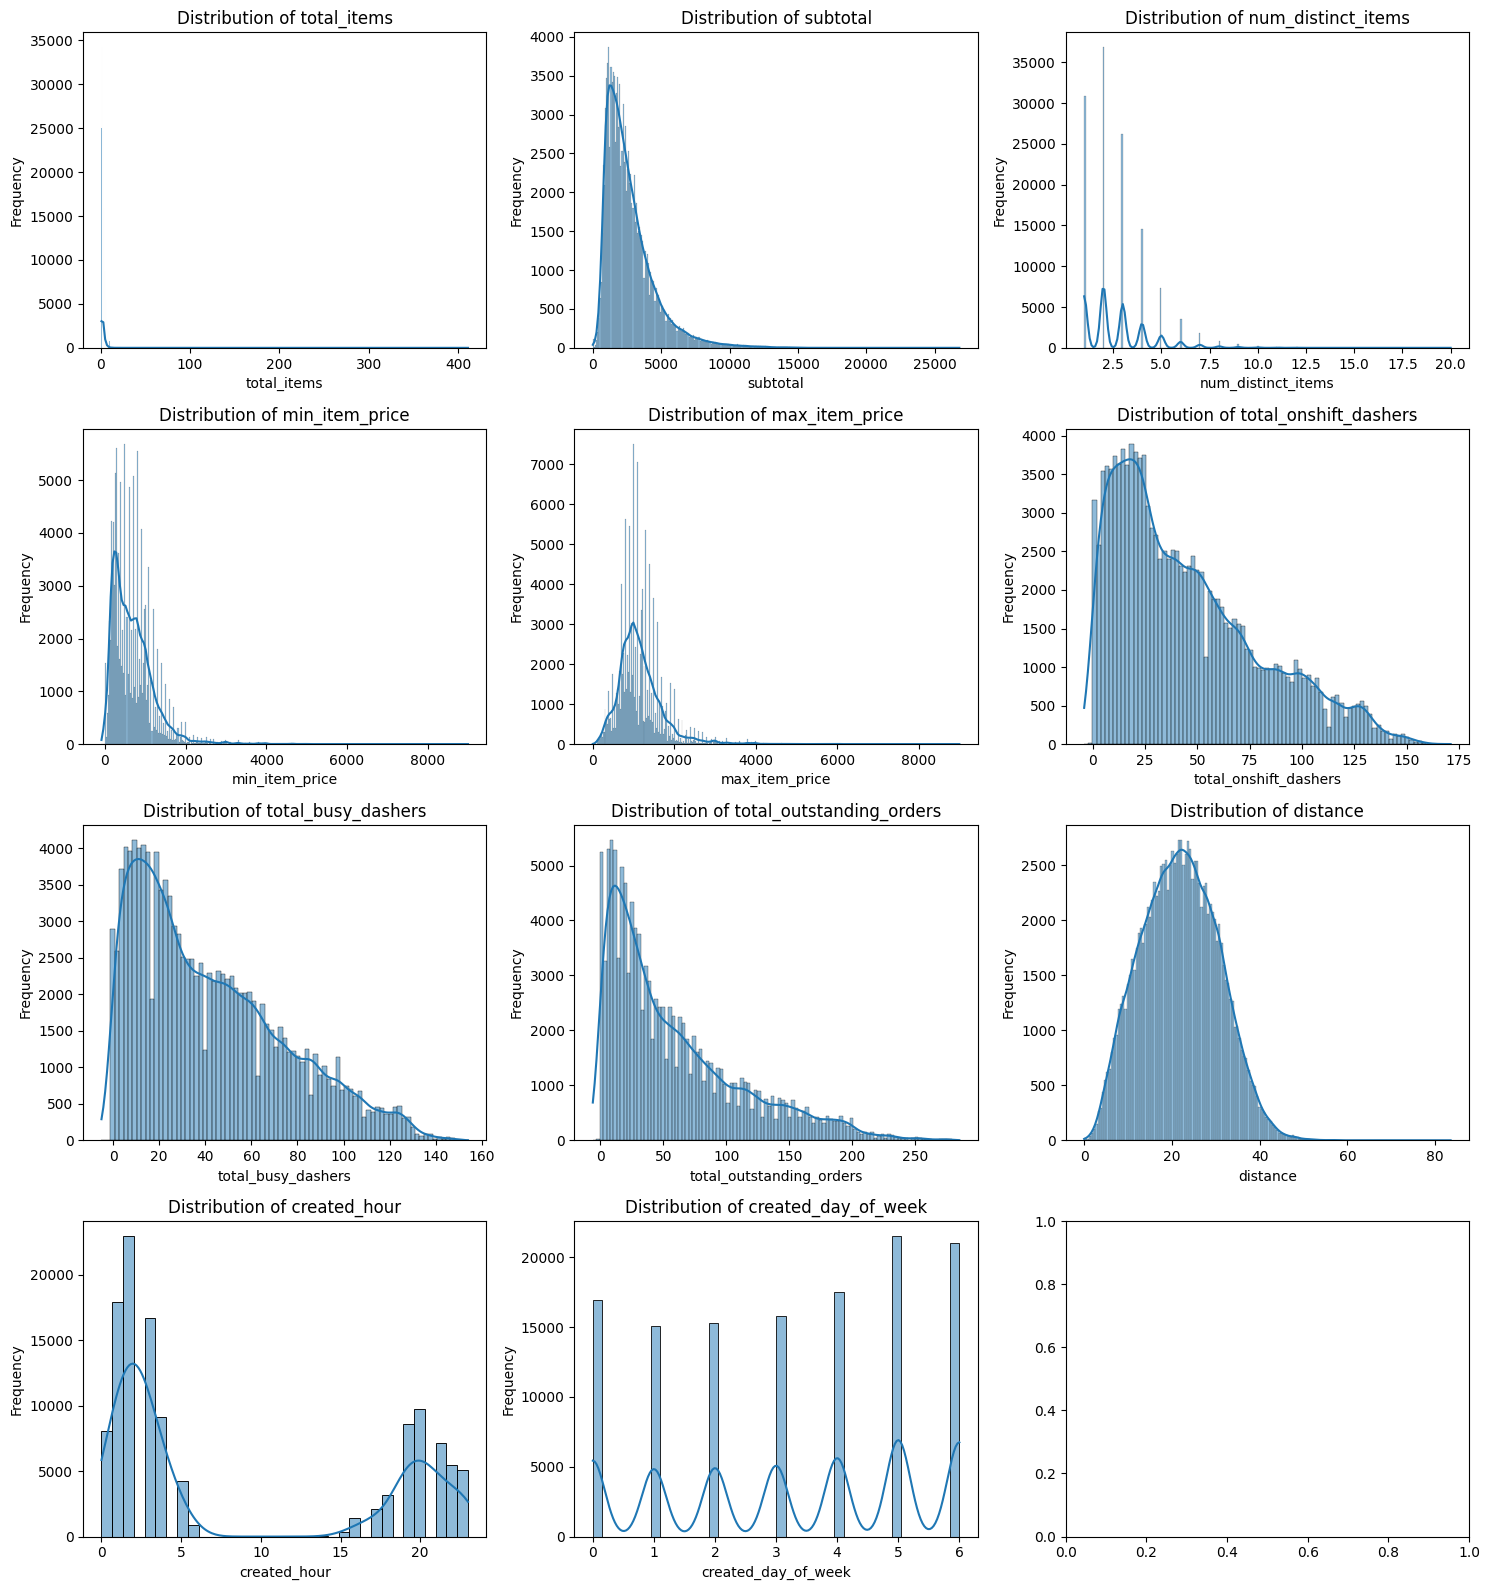

In [24]:
# Plot distributions for all numerical columns

cols = 3  # number of plots in one row
rows = (len(numerical_cols) + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(x=x_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

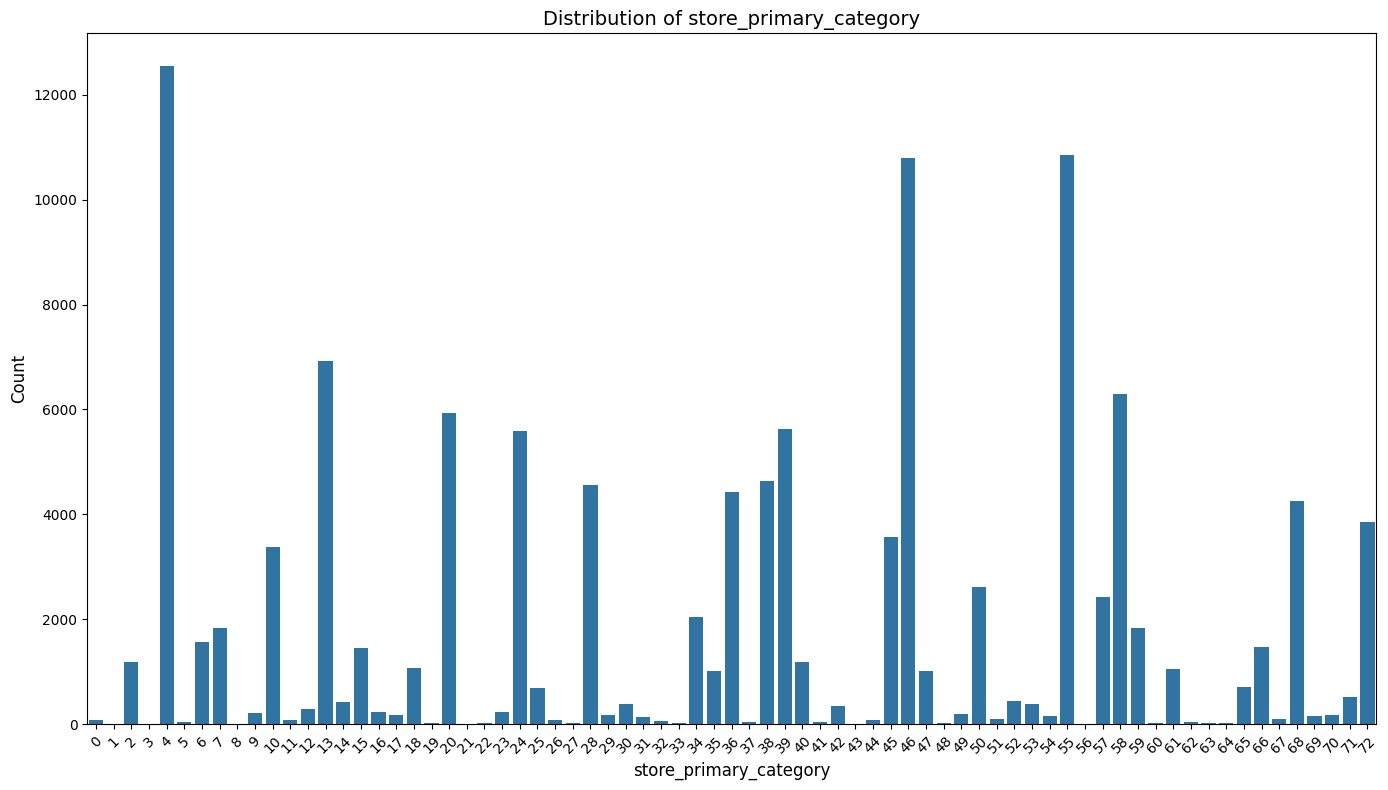

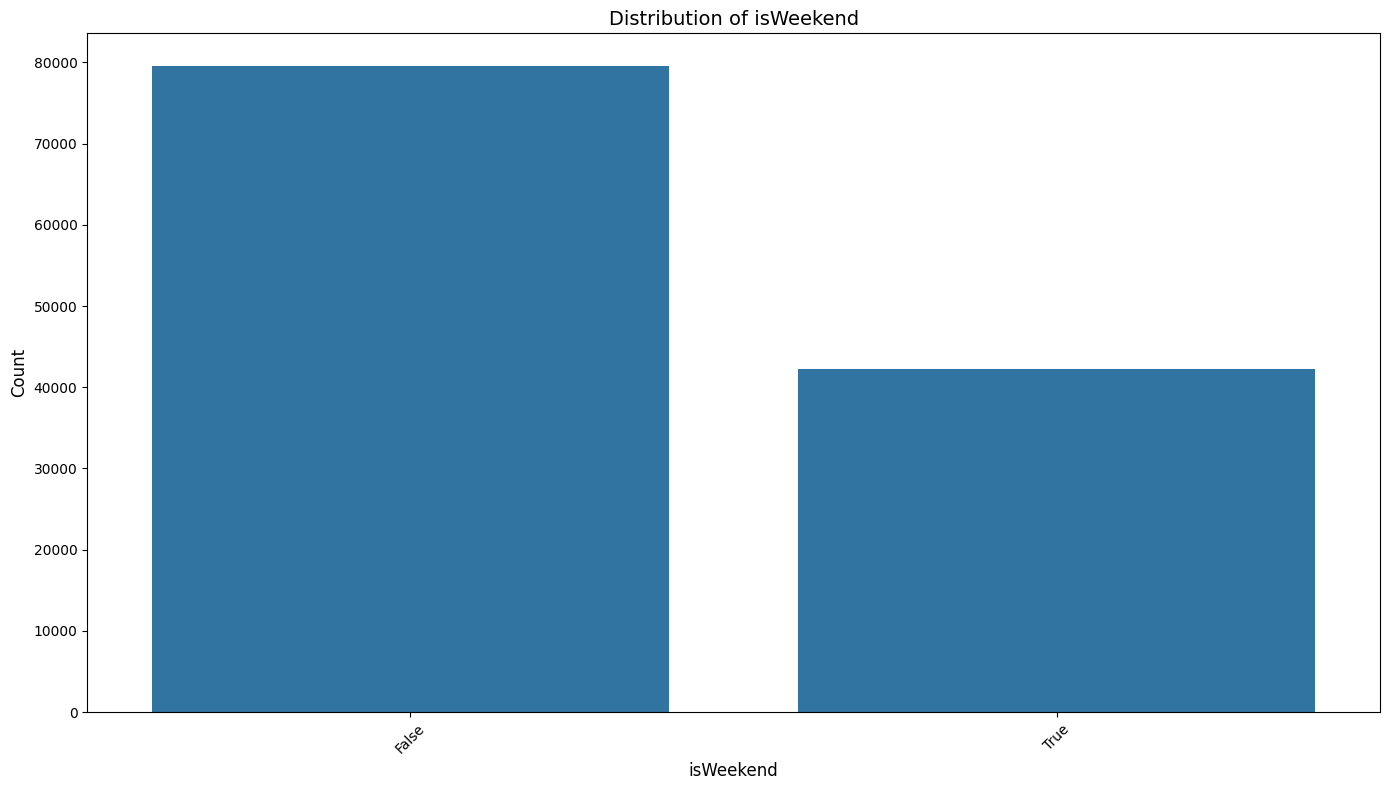

In [78]:
# Distribution of categorical columns

for col in categorical_cols:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=x_train[col])
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

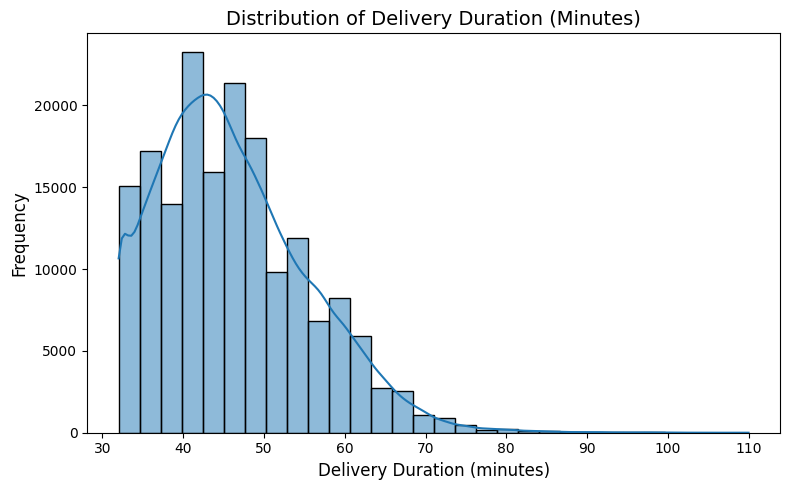

In [26]:
# Distribution of time_taken

plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=30)  # y is your target
plt.title('Distribution of Delivery Duration (Minutes)', fontsize=14)
plt.xlabel('Delivery Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

(0.0, 100.0)

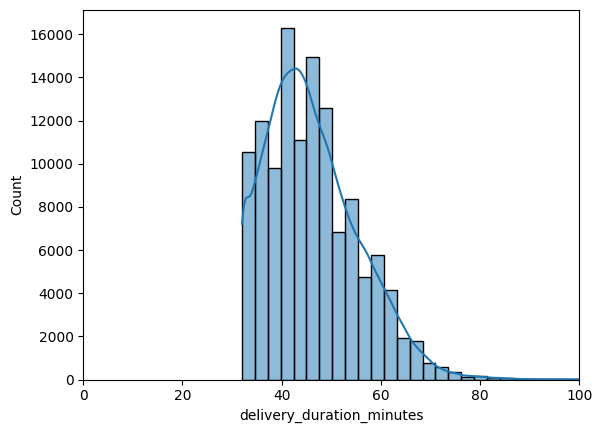

In [27]:
sns.histplot(y_train, kde=True, bins=30)
plt.xlim(0, 100)  # Adjust this to see more clearly

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

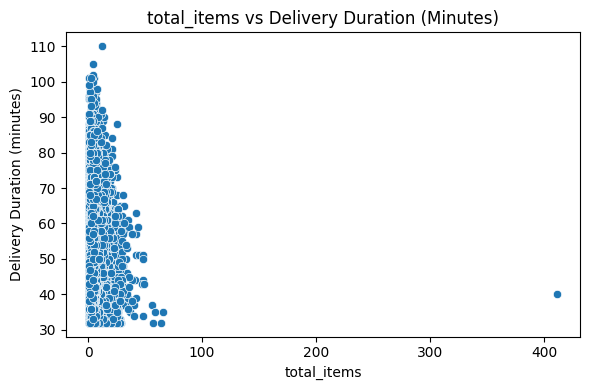

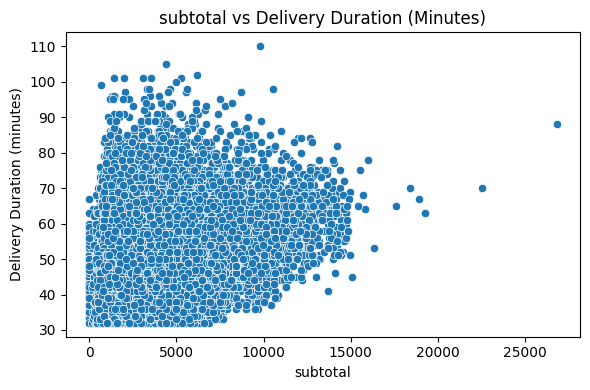

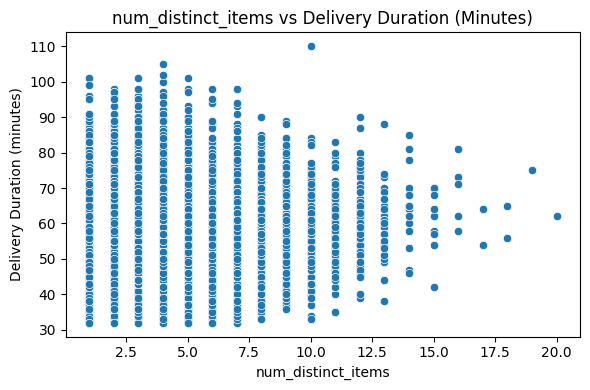

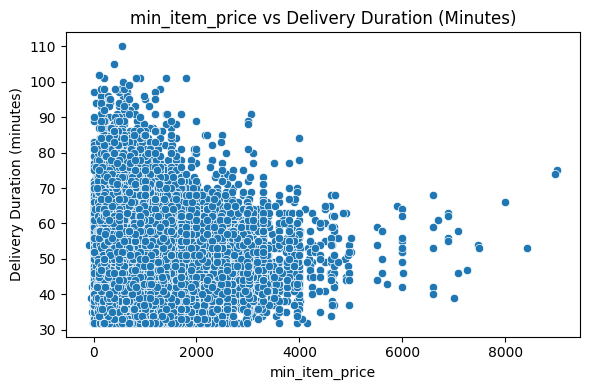

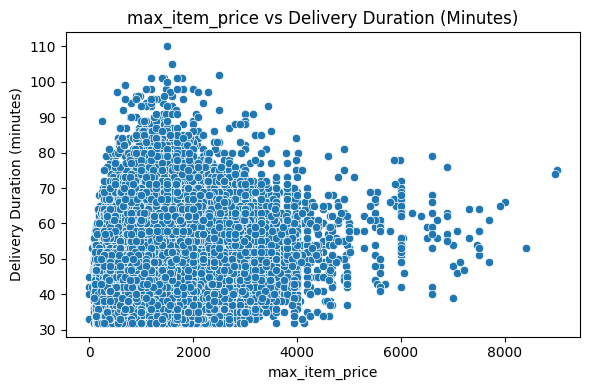

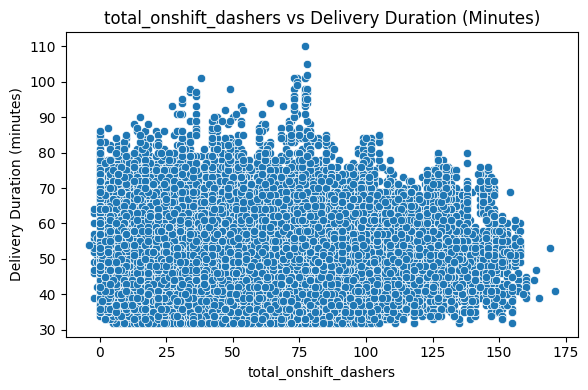

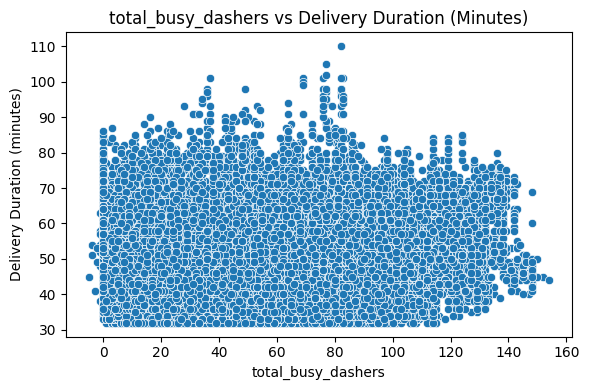

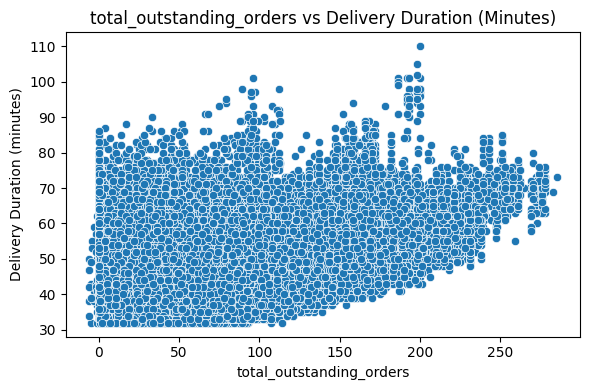

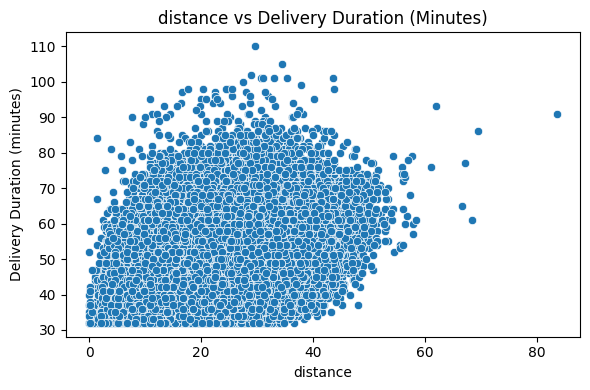

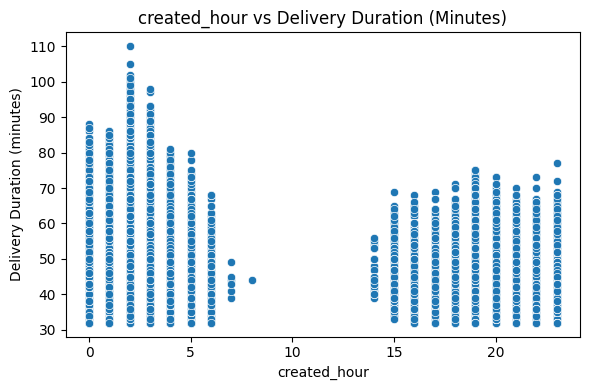

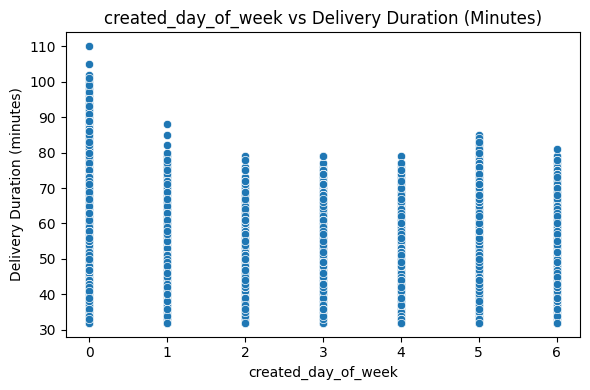

In [28]:
# Scatter plot to visualise the relationship between time_taken and other features

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=x_train[col], y=y_train)
    plt.title(f'{col} vs Delivery Duration (Minutes)')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')
    plt.tight_layout()
    plt.show()

<Axes: xlabel='created_day_of_week', ylabel='delivery_duration_minutes'>

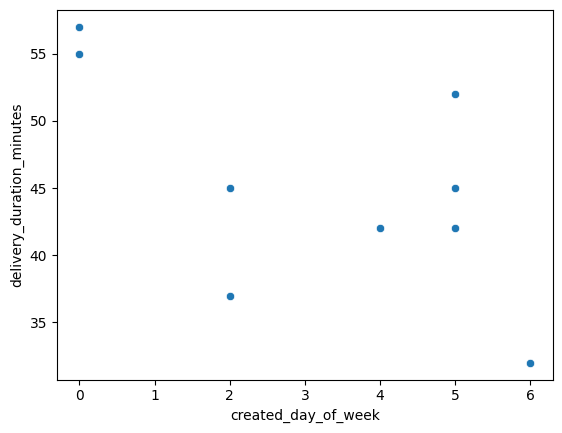

In [29]:
sns.scatterplot(x=x_train[col].sample(1000), y=y_train.sample(1000))

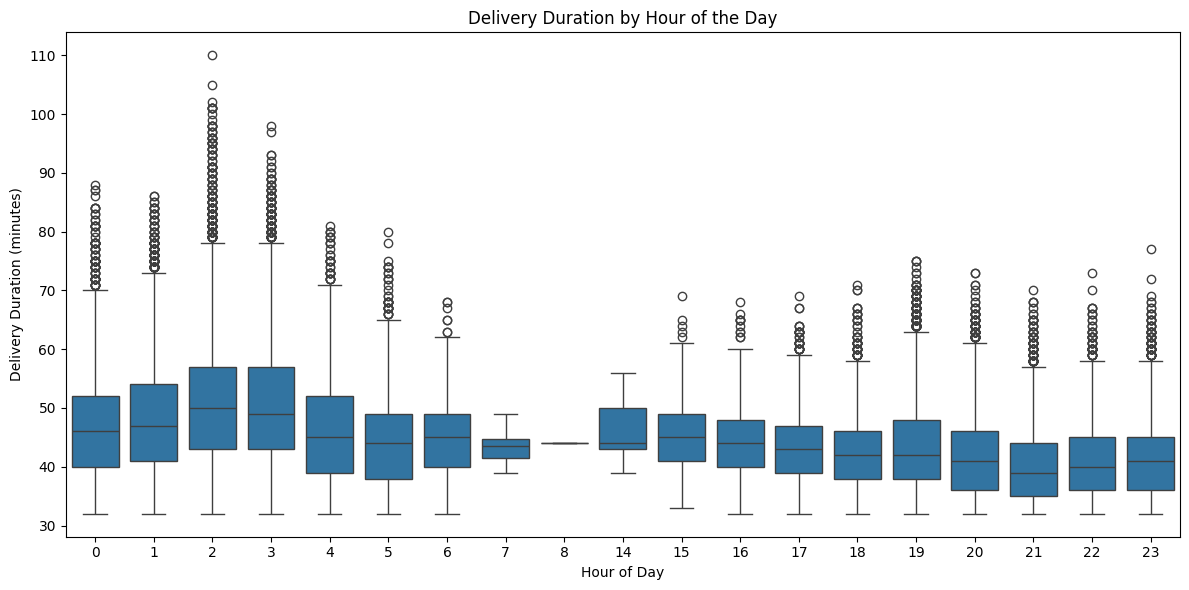

In [30]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=x_train['created_hour'], y=y_train)
plt.title('Delivery Duration by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [31]:
corr_df = x_train.copy()
corr_df['delivery_duration_minutes'] = y_train

In [32]:
corr_matrix = corr_df.corr(numeric_only=True)

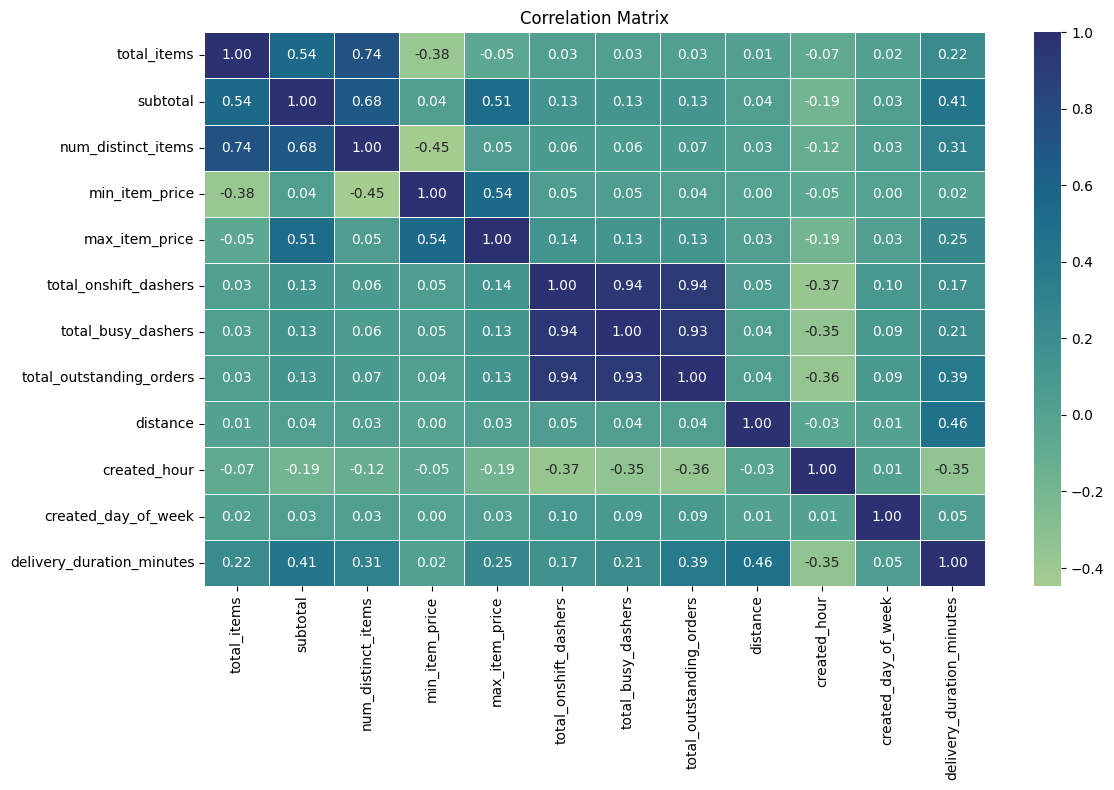

In [33]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [34]:
corr_matrix['delivery_duration_minutes'].sort_values(ascending=False)

,delivery_duration_minutes
delivery_duration_minutes,1.000000
distance,0.460033
subtotal,0.412902
total_outstanding_orders,0.385424
num_distinct_items,0.313315
max_item_price,0.253317
total_items,0.217966
total_busy_dashers,0.206014
total_onshift_dashers,0.171863
created_day_of_week,0.045481


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [35]:
# Drop 3-5 weakly correlated columns from training dataset

correlation_with_target = corr_matrix['delivery_duration_minutes'].abs().sort_values()
print(correlation_with_target.head(6))

min_item_price           0.019842
created_day_of_week      0.045481
total_onshift_dashers    0.171863
total_busy_dashers       0.206014
total_items              0.217966
max_item_price           0.253317
Name: delivery_duration_minutes, dtype: float64


In [36]:
weak_features = ['min_item_price', 'num_distinct_items', 'max_item_price', 'total_outstanding_orders', 'order_protocol']
x_train = x_train.drop(columns=weak_features)
x_test = x_test.drop(columns=weak_features)

In [37]:
[col for col in weak_features if col in x_train.columns]

[]

In [38]:
print(x_train.shape, x_test.shape)

(123043, 9) (52734, 9)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

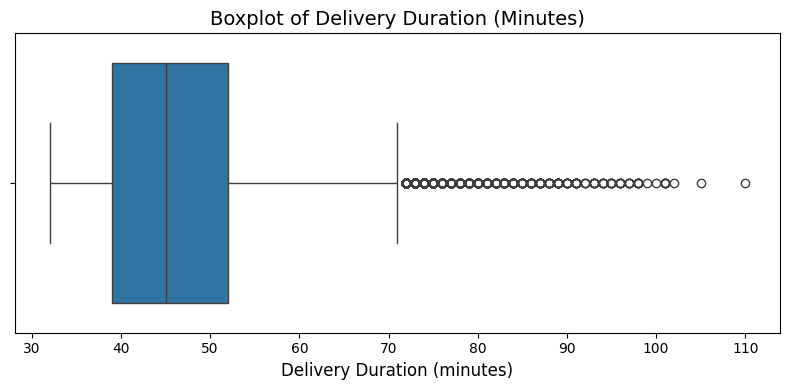

In [39]:
# Boxplot for time_taken

plt.figure(figsize=(8, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot of Delivery Duration (Minutes)', fontsize=14)
plt.xlabel('Delivery Duration (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [40]:
# Handle outliers

import pandas as pd

train_df = x_train.copy()
train_df['delivery_duration_minutes'] = y_train.values

Q1 = train_df['delivery_duration_minutes'].quantile(0.25)
Q3 = train_df['delivery_duration_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_df = train_df[(train_df['delivery_duration_minutes'] >= lower_bound) &
    (train_df['delivery_duration_minutes'] <= upper_bound)]

x_train = filtered_df.drop(columns='delivery_duration_minutes')
y_train = filtered_df['delivery_duration_minutes']

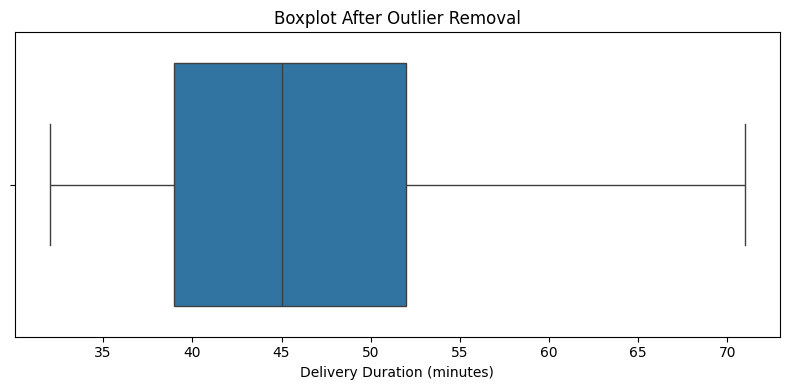

In [41]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=y_train)
plt.title('Boxplot After Outlier Removal')
plt.xlabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [42]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [43]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [44]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [45]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [46]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [47]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [48]:
# Import libraries

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [49]:
categorical_cols = ['store_primary_category', 'isWeekend']

numerical_cols = ['total_items', 'subtotal',
                  'total_onshift_dashers', 'total_busy_dashers',
                  'distance', 'created_hour', 'created_day_of_week']

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [50]:
# Apply scaling to the numerical columns

scaler = StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [51]:
# Create/Initialise the model

lr_model = LinearRegression()

In [52]:
# Train the model using the training data

lr_model.fit(x_train, y_train)

LinearRegression()

In [53]:
x_train.head()
y_train.head()

,delivery_duration_minutes
94465,51.0
100712,45.0
153524,40.0
85660,32.0
100506,33.0


In [54]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)

X_train shape: (121843, 9)
Y_train shape: (121843,)


In [55]:
x_train.describe()

,total_items,subtotal,total_onshift_dashers,total_busy_dashers,distance,created_hour,created_day_of_week
count,1.218430e+05,1.218430e+05,1.218430e+05,1.218430e+05,1.218430e+05,1.218430e+05,1.218430e+05
mean,-7.172899e-18,9.386001e-17,7.429491e-17,2.367640e-17,1.007705e-16,9.552202e-17,-6.997951e-19
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-7.977821e-01,-1.481061e+00,-1.414089e+00,-1.455181e+00,-2.501871e+00,-9.829101e-01,-1.593366e+00
25%,-4.337284e-01,-7.064718e-01,-8.056217e-01,-8.323453e-01,-7.455805e-01,-7.529089e-01,-1.101785e+00
50%,-6.967466e-02,-2.638496e-01,-2.261289e-01,-2.406511e-01,-5.363957e-03,-6.379083e-01,-1.186237e-01
75%,2.943791e-01,3.978706e-01,5.851611e-01,6.313193e-01,7.164621e-01,1.202101e+00,8.645381e-01
max,1.484643e+02,1.096769e+01,3.656473e+00,3.496365e+00,5.364654e+00,1.662104e+00,1.356119e+00


In [56]:
y_train.describe()

,delivery_duration_minutes
count,121843.000000
mean,45.890244
std,8.812388
min,32.000000
25%,39.000000
50%,45.000000
75%,52.000000
max,71.000000


In [57]:
x_train.isnull().sum()
y_train.isnull().sum()

np.int64(0)

In [58]:
# Make predictions

y_pred = lr_model.predict(x_test)
print(y_pred[:5])

[49.92160303 49.948113   39.31166096 41.42305756 42.67357941]


In [59]:
# Find results for evaluation metrics

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", round(r2, 4))

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", round(mae, 2))

# Root Mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))

R² Score: 0.4741
Mean Absolute Error (MAE): 5.08
Root Mean Squared Error (RMSE): 6.78


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [60]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE

lr_model = LinearRegression()

rfe = RFE(estimator=lr_model, n_features_to_select=8)
rfe.fit(x_train, y_train)

selected_features = x_train.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

Selected features: ['total_items', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'distance', 'created_hour', 'created_day_of_week', 'isWeekend']


In [61]:
# Build the final model with selected number of features

x_train_final = x_train[selected_features]
x_test_final = x_test[selected_features]

In [62]:
final_model = LinearRegression()
final_model.fit(x_train_final, y_train)

LinearRegression()

In [63]:
y_pred_final = final_model.predict(x_test_final)

In [64]:
# Evaluate the final model

print("R² Score:", r2_score(y_test, y_pred_final))
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_final)))

R² Score: 0.47410711730783184
MAE: 5.084958036247984
RMSE: 6.777453340017732


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [65]:
residuals = y_test - y_pred_final

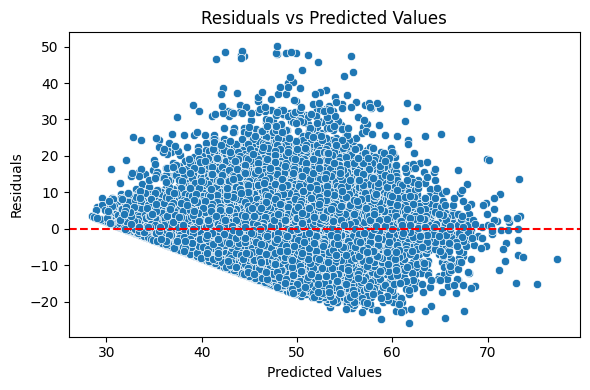

In [66]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

# Residuals VS Predicted Values Plot

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_final, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

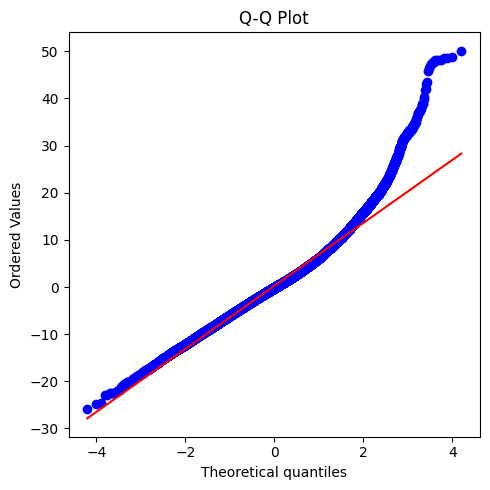

In [67]:
import scipy.stats as stats

#Q-Q Plot

plt.figure(figsize=(5, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.tight_layout()
plt.show()

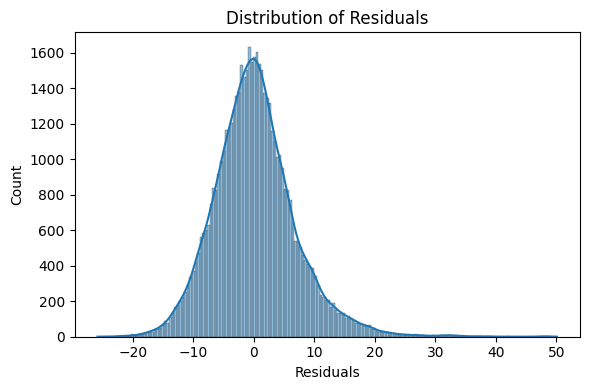

In [68]:
# Histogram of Residuals

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [69]:
# Compare the scaled vs unscaled features used in the final model

# Train model on Unscaled data

x_train_unscaled = x_train[selected_features]
x_test_unscaled = x_test[selected_features]

In [70]:
unscaled_model = LinearRegression()
unscaled_model.fit(x_train_unscaled, y_train)

# Get coefficients
unscaled_coeffs = pd.Series(unscaled_model.coef_, index=selected_features)
print("Unscaled Coefficients:\n", unscaled_coeffs)

Unscaled Coefficients:
 total_items              0.156541
subtotal                 2.879004
total_onshift_dashers   -2.794184
total_busy_dashers       2.929050
distance                 3.947384
created_hour            -2.415472
created_day_of_week     -0.865742
isWeekend                3.804255
dtype: float64


<Axes: >

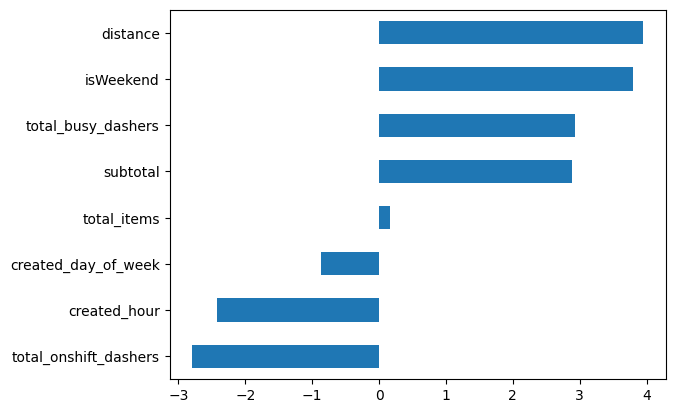

In [79]:
unscaled_coeffs.sort_values().plot(kind='barh')

In [71]:
# Scaled coefficients
scaled_coeffs = pd.Series(final_model.coef_, index=selected_features)
print("Scaled Coefficients:\n", scaled_coeffs)

Scaled Coefficients:
 total_items              0.156541
subtotal                 2.879004
total_onshift_dashers   -2.794184
total_busy_dashers       2.929050
distance                 3.947384
created_hour            -2.415472
created_day_of_week     -0.865742
isWeekend                3.804255
dtype: float64


In [72]:
comparison = pd.DataFrame({
    'Scaled Coefficients': scaled_coeffs,
    'Unscaled Coefficients': unscaled_coeffs
})
print(comparison)

                       Scaled Coefficients  Unscaled Coefficients
total_items                       0.156541               0.156541
subtotal                          2.879004               2.879004
total_onshift_dashers            -2.794184              -2.794184
total_busy_dashers                2.929050               2.929050
distance                          3.947384               3.947384
created_hour                     -2.415472              -2.415472
created_day_of_week              -0.865742              -0.865742
isWeekend                         3.804255               3.804255


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [73]:
# Analyze the effect of a unit change in a feature, say 'total_items'

# using unscaled model
coef_total_items = unscaled_model.coef_[selected_features.get_loc('total_items')]
print(f"Unscaled Coefficient for total_items: {coef_total_items:.4f}")

Unscaled Coefficient for total_items: 0.1565


In [74]:
# using scaled model
coef_scaled = final_model.coef_[selected_features.get_loc('total_items')]
print(f"Scaled Coefficient for total_items: {coef_scaled:.4f}")

Scaled Coefficient for total_items: 0.1565


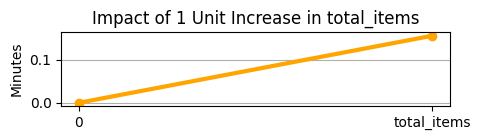

In [75]:
plt.figure(figsize=(5, 1.5))
plt.plot(['0', 'total_items'], [0, coef_scaled], marker='o', color='orange', linewidth=3)
plt.title("Impact of 1 Unit Increase in total_items")
plt.ylabel("Minutes")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Yes there are few categorical variables in the data. The main one's are
- `store_primary_category`
- `isWeekend `

From my analysis
- `store_primary_category` affects the delivery times because different stores have different handling and preparation times
- `isWeekend helps` us to know if the order was placed on a weekend. Delivery time is usually a bit higher on weekends due to more orders and less availability.

So yes, these categorical variables do affect the delivery time in small but useful ways.

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

`test_size = 0.2` just means that 20% of the data is used for testing, and the rest 80% is used to train the model.

- We do this to check how well the model performs on data it hasn’t seen before.
- Basically, the model learns from the 80% part, and we test how good it is using the remaining 20%.



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

`subtotal` has the highest correlation with `delivery_duration_minutes`. Because bigger or costlier orders usually take more time to prepare and deliver.

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

To find the outliers, I used the IQR method. Basically, I calculated Q1 and Q3 for the target `(delivery_duration_minutes)` and got the IQR. Then I used that to check which values were too far from the usual range — like,
below Q1 - 1.5×IQR or above Q3 + 1.5×IQR.

After that, I just removed those outlier rows from the training data so that the model doesn’t get confused or thrown off by extreme values. That way, it learns better from the normal range.



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

Based on the final trained Linear Regression model, the top 3 features that significantly affect the delivery time are:

- `subtotal` ranks highest, which shows that the total cost of the order plays a major role in estimating delivery time.

- `total_items` represents the number of items ordered — more items usually mean more prep and packing time.

- `num_distinct_items` adds to the complexity as different items may need different cooking or packing methods, increasing the time needed.

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear regression is a simple and commonly used algorithm in machine learning and statistics. It’s used when we want to predict a continuous value based on one or more input features.

It tries to find the best straight line (or hyperplane) that fits the data points. The goal is to learn the relationship between the features (inputs) and the target (output).

The formula:

`y = b0 + b1.x1 + b2.x2 + ... + bn.xn`

Here,
- `y` is the predicted value
- `x1, x2, ..., xn` are the input features
- `b0` is the intercept
- `b1, b2, ..., bn` are the coefficients (weights)

Each coefficient tells us how much that feature influences the output.

- So here the model learns the best values for the coefficients by minimizing the error between the actual values and the predicted values. This is done using a method called Ordinary Least Squares (OLS).
- So the error is
  
  `error = actual - predicted`

- The model tries to reduce the sum of squared errors across all data points.

Hence from linear regression model we can get
- A prediction for the target variable
- Coefficients that show how important each feature is  

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

**Simple Linear Regression**
- It uses only one input feature to predict the target.
- The formula looks like:
`y = b0 + b1.x`
- Eg: Predicting delivery time from distance

**Multiple Linear Regression**
- It uses two or more features to predict the target.
- The formula looks like:
`y = b0 + b1.x1 + b2.x2 + ... + bn.xn`
- Eg: Predicting delivery time from distance, total items, and traffic

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


The cost function in linear regression measures how far the predicted values are from the actual values. It helps the model understand how well it is performing.

In linear regression, we usually use the Mean Squared Error (MSE) as the cost function. The goal is to minimize this error so that the predictions are as accurate as possible.

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

- **Overfitting** happens when the model learns too much from the training data, including noise or random patterns. It performs well on training data but poorly on new data (testing). It’s like memorizing instead of understanding.

- **Underfitting** happens when the model doesn’t learn enough from the data. It performs badly on both training and testing sets because it’s too simple to capture the actual patterns.



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual plots help us see how well the linear regression model is working.

They show the difference between the actual values and the predicted values (these differences are called residuals).

By looking at the residual plot, we can check:

- If the errors are randomly scattered — that’s good (means the model fits well)

- If there’s a pattern or curve — that’s bad (model is missing something)

- If the spread is uneven — it might mean the variance changes, which is not ideal

So basically, residual plots help us check if our model is making consistent errors or not.